### ASSIGNMENT 6
### Topic - Logistic Regression
### By Tushar N. Mondkar (Batch of 27 March,Andheri)
### Mentor - Jayantilal Sir

__Q) Output variable -> y__

__y -> Whether the client has subscribed a term deposit or not__

__Binomial ("yes" or "no")__


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading data
import pandas as pd

data = pd.read_csv("bank-full.csv",sep = ';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Dummy encoding
df = pd.get_dummies(data)
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [4]:
#Checking of null values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
#Selecting target and predictors
df2 = df.loc[:,df.columns != "y"]  # select all columns except y
x = df2.iloc[:,:].values
y = df.iloc[:,8].values

In [6]:
#model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [7]:
y_pred = classifier.predict(x)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=uint8)

In [8]:
y_pred_proba = classifier.predict_proba(x)
y_pred_proba

array([[9.99523100e-01, 4.76900442e-04],
       [9.94870457e-01, 5.12954306e-03],
       [2.21237929e-01, 7.78762071e-01],
       ...,
       [9.99999015e-01, 9.85432364e-07],
       [2.07862423e-01, 7.92137577e-01],
       [9.99999998e-01, 1.75764819e-09]])

In [9]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_prob': classifier.predict(x)})
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,1
3,1,1
4,0,0
...,...,...
45206,0,0
45207,0,0
45208,0,0
45209,1,1


In [10]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y,y_pred))

[[34968   511]
 [  709  9023]]


In [11]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     35479
           1       0.95      0.93      0.94      9732

    accuracy                           0.97     45211
   macro avg       0.96      0.96      0.96     45211
weighted avg       0.97      0.97      0.97     45211



Text(0, 0.5, 'True Positive Rate')

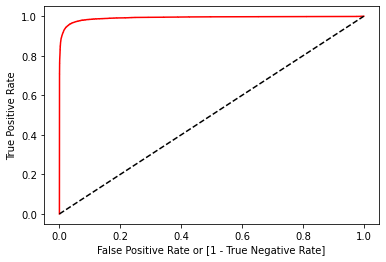

In [12]:
# roc curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0,1], [0, 1], 'k--')    # K-- plots dotted line
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [13]:
auc

0.9563723341225673